Sara Hernández Ochoa 

# Teorico

#### Solo las respuestas incorrectas

1. Explica el modelo de regresión logística para clasificación. ¿Cómo se determina el umbral de decisión?

El modelo de regresión logística es un modelo estadístico utilizado para problemas de clasificación binaria. Estima la probabilidad de que ocurra un determinado evento, por ejemplo, que un cliente decida comprar un producto o no, a partir de un conjunto de variables independientes. El umbral de decisión se determina mediante el método de máxima verosimilitud, buscando los valores que hacen más probable observar los datos disponibles.

2. Explica la intuición de la máquina de soporte vectorial para clasificación. ¿Cómo se determina qué modelo es mejor? ¿Cuál es la mayor diferencia que tiene contra un modelo de regresión logística?

Una máquina de soporte vectorial (SVM) trata de encontrar la línea o superficie que mejor separa las clases de datos, dejando el mayor espacio posible entre ellas. Por ejemplo, puede usarse para distinguir correos electrónicos “spam” de los que no lo son, analizando características como palabras clave o frecuencia de enlaces. El mejor modelo se elige probando diferentes configuraciones y quedándose con el que clasifica mejor los datos de prueba, normalmente usando validación cruzada. La principal diferencia con la regresión logística es que la SVM se enfoca en separar las clases con el mayor margen posible, mientras que la regresión logística busca predecir la probabilidad de que un dato pertenezca a una clase.

3. ¿Cuáles son los componentes principales en un MLP para clasificación? Dibuja un ejemplo y señaliza.

CORRECTA

4. ¿Cuál es el procedimiento a seguir cuando los datos no son linealmente separables en una SVC?

CORRECTA

5. Describe qué es un hiperparámetro. ¿Por qué es importante ajustarlos? Da dos ejemplos de hiperparámetros.

Un hiperparámetro es un valor o conjunto de valores que se define antes de entrenar un modelo y que controla su comportamiento o estructura. Estos valores no se aprenden de los datos, sino que se establecen para guiar el proceso de entrenamiento. Ajustarlos correctamente es clave porque afectan el rendimiento y la capacidad del modelo para generalizar. Un mal ajuste puede hacer que el modelo aprenda de forma ineficiente o se sobreajuste. Dos ejemplos de hiperparámetros son la tasa de aprendizaje en un modelo de gradiente descendente y la profundidad máxima de un árbol de decisión.

6. Dibuja un diagrama de flujo para describir el proceso de optimización Bayesiana.

CORRECTA

7. ¿Qué es la curva ROC y cómo se usa para evaluar el desempeño de un modelo?

La curva ROC, Receiver Operating Characteristic, es una gráfica que muestra el desempeño de un modelo de clasificación binaria al variar el umbral de decisión. En el eje X se representa la tasa de falsos positivos (FPR) y en el eje Y la tasa de verdaderos positivos (TPR). Por ejemplo, en un modelo que predice si una transacción es fraudulenta o no, cada punto de la curva corresponde a un valor distinto del umbral usado para decidir si una operación se considera sospechosa. Al mover el umbral de 0 a 1, el modelo genera diferentes pares de valores (FPR, TPR) que forman la curva completa. Para evaluar su desempeño se calcula el área bajo la curva (AUC); cuanto más cercana a 1 sea esta, mejor será la capacidad del modelo para distinguir entre las clases, mientras que un valor de 0.5 indica un modelo que clasifica al azar.

8. Describe un espacio de Hilbert.

El espacio de Hilbert representa un espacio vectorial de dimensión infinita al que se transforman los datos para facilitar su separación. En otras palabras, es un espacio más grande o con más dimensiones donde los datos que antes no podían separarse con una línea o plano ahora sí pueden distinguirse mejor. Por ejemplo, en un modelo que intenta clasificar flores según su forma y color, al llevar los datos al espacio de Hilbert, se pueden separar especies que antes se traslapaban en el espacio original.

9. ¿Qué significa que una función de costo sea convexa? ¿Qué beneficios hay de que un modelo tenga una función de costo convexa?

CORRECTA

10. Piensa en los 3 modelos aprendidos en este parcial: ¿En qué situaciones usarías cada uno y por qué?

Regresión Logística: La emplearía en problemas de clasificación binaria donde los datos se puedan separar de forma lineal o casi lineal. Es un modelo rápido, fácil de interpretar y sencillo de implementar. Por ejemplo, serviría para estimar si una persona padece o no diabetes a partir de sus características.

SVC: La utilizaría cuando los datos no se puedan separar linealmente o presenten una estructura más compleja, aprovechando la capacidad de los kernels para transformar el espacio de los datos. Por ejemplo, podría aplicarse para clasificar distintos tipos de imágenes.

MLP: La usaría en casos no lineales y de mayor complejidad, especialmente cuando se dispone de una gran cantidad de datos. Este modelo puede captar relaciones más profundas entre las variables. Por ejemplo, sería útil para identificar patrones en imágenes, sonidos o textos, donde intervienen muchos factores.


# Examen 2 - Clasificación

## Pregunta 1

Utiliza optimización bayesiana para intentar encontrar el mínimo global de la siguiente función:

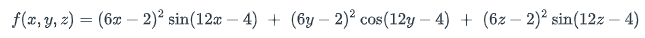

donde las 3 variables están acotadas en [0, 1]. Crea 5 muestras iniciales e itera 15 veces para optimizar.

 

Explica por qué optimización bayesiana es una elección buena para este problema en lugar de GridSearch.

In [1]:
import warnings
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

warnings.filterwarnings("ignore")

In [29]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF
from scipy.stats import norm

def iteracion(funcion, X, Y, Z, x, y, z, n_iter=5, tipo="reducir incertidumbre", nivel_conf=0.95):
    X = np.asarray(X).reshape(-1, 1)
    Y = np.asarray(Y).reshape(-1, 1)
    Z = np.asarray(Z).reshape(-1, 1)
    x = np.asarray(x).reshape(-1, 1)
    y = np.asarray(y).reshape(-1, 1)
    z = np.asarray(z).reshape(-1, 1)

    f_vals = funcion(X, Y, Z).ravel()

    kernel = 1.0 * RBF(length_scale=1.0)
    gp = GPR(kernel=kernel, n_restarts_optimizer=10)
    gp.fit(X, f_vals)

    for i in range(n_iter):
        y_pred, std = gp.predict(x, return_std=True)
        y_pred = y_pred.ravel()

        nc = norm.ppf(1 - (1 - nivel_conf) / 2)
        y_upper = y_pred + nc * std
        y_lower = y_pred - nc * std

        if tipo == "reducir incertidumbre":
            index = np.argmax(std)
        elif tipo == "maximizar":
            index = np.argmax(y_upper)
        elif tipo == "minimizar":
            index = np.argmin(y_lower)

        x_val = x[index].reshape(1, -1)
        y_val = funcion(x_val, x_val, x_val).ravel()[0] 

        X = np.vstack([X, x_val])
        f_vals = np.concatenate([f_vals, np.array([y_val])])

        gp.fit(X, f_vals)

        print(f"Iteración {i + 1}: Nuevo punto = {x_val.ravel()[0]:.4f}, Valor función = {y_val:.4f}")

# Funcion objetivo
def f(x, y, z):
    return (6*x - 2)**2 * np.sin(12*x - 4) + (6*y - 2)**2 * np.cos(12*y - 4) + (6*z - 2)**2 * np.sin(12*z - 4)

# 5 muestras iniciales aleatorias
np.random.seed(10)
X = np.random.uniform(0, 1, 5).reshape([-1, 1])
Y = np.random.uniform(0, 1, 5).reshape([-1, 1])
Z = np.random.uniform(0, 1, 5).reshape([-1, 1])

#Búsqueda
x = np.linspace(0, 1, 1000).reshape([-1, 1])
y = np.linspace(0, 1, 1000).reshape([-1, 1])
z = np.linspace(0, 1, 1000).reshape([-1, 1])


iteracion(f, X, Y, Z, x, y, z, n_iter=15, tipo="minimizar")


Iteración 1: Nuevo punto = 0.7487, Valor función = -10.2936
Iteración 2: Nuevo punto = 0.7718, Valor función = -8.1970
Iteración 3: Nuevo punto = 0.7708, Valor función = -8.3160
Iteración 4: Nuevo punto = 0.0000, Valor función = 3.4398
Iteración 5: Nuevo punto = 0.0010, Valor función = 3.3204
Iteración 6: Nuevo punto = 0.0020, Valor función = 3.2017
Iteración 7: Nuevo punto = 0.0030, Valor función = 3.0838
Iteración 8: Nuevo punto = 0.0040, Valor función = 2.9667
Iteración 9: Nuevo punto = 0.0050, Valor función = 2.8505
Iteración 10: Nuevo punto = 0.0060, Valor función = 2.7351
Iteración 11: Nuevo punto = 0.0070, Valor función = 2.6205
Iteración 12: Nuevo punto = 0.7337, Valor función = -10.9612
Iteración 13: Nuevo punto = 0.0080, Valor función = 2.5069
Iteración 14: Nuevo punto = 0.0090, Valor función = 2.3941
Iteración 15: Nuevo punto = 0.0100, Valor función = 2.2822


Usando optimización bayesiana conseguimos encontrar rápido el mínimo de la función, llegando al valor más bajo en la iteración 12 con x = 0.7337 y función = –10.9612.

## Pregunta 2

Utiliza el modelo de tu elección, con los hiperparámetros y factores de tu elección para obtener el mejor predictor que puedas conseguir para decidir si un paciente del dataset padece diabetes.

Cross-validation a utilizar: K-folds.

Métrico a utilizar: Precisión.

In [4]:
data = pd.read_csv('diabetes.csv')
y = data['Outcome']
X = data.drop(columns=['Outcome'])
scaler = StandardScaler().fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [6]:
def run_model(x: np.ndarray, y: np.ndarray, C: float) -> dict:
    kf = KFold(n_splits=10, shuffle=True)

    lr_model = LogisticRegression(max_iter=1000, C=C)
    lr_model.fit(x, y)
    lr_scores = cross_val_score(lr_model, x, y, cv=kf, scoring='precision')
    lr_predict = lr_model.predict_proba(x)[:, 1]
    lr_results = {
        'mean': lr_scores.mean(),
        'std': lr_scores.std(),
        'predictions': lr_predict
    }


    print(
        f"\nLogistic Regression: Precision = {lr_results['mean']:.4f} ± {lr_results['std']:.4f}")

    return {
        'lr_results': lr_results
    }

run_model(X.values, y.values, 2)


Logistic Regression: Precision = 0.7295 ± 0.1264


{'lr_results': {'mean': 0.7295172219085262,
  'std': 0.12640381775541584,
  'predictions': array([0.71981638, 0.04933123, 0.79421539, 0.04226898, 0.90041553,
         0.14753243, 0.06731905, 0.64097778, 0.7097593 , 0.03721347,
         0.22044378, 0.89587106, 0.78299976, 0.63136585, 0.62706761,
         0.39906913, 0.37177202, 0.19736995, 0.35667009, 0.23497608,
         0.39290264, 0.31760973, 0.93916912, 0.29478265, 0.70111706,
         0.44118653, 0.7353875 , 0.04651918, 0.5392435 , 0.27861723,
         0.42608398, 0.57257665, 0.04967327, 0.03712914, 0.43217669,
         0.15065195, 0.66342646, 0.39336248, 0.17298955, 0.5723509 ,
         0.74155082, 0.69469157, 0.11492119, 0.92606855, 0.62715685,
         0.95124578, 0.43321492, 0.04038956, 0.38030842, 0.03940934,
         0.03682523, 0.08594148, 0.06815446, 0.82610491, 0.70780091,
         0.02307931, 0.8817425 , 0.35816004, 0.83150367, 0.18399248,
         0.01011081, 0.52045455, 0.02385955, 0.3085604 , 0.35427064,
         0.119

In [8]:
def run_model(x: np.ndarray, y: np.ndarray) -> dict:
    kf = KFold(n_splits=10, shuffle=True)

    svm_results = {}
    for kernel in kernels:
        svm_model = SVC(kernel=kernel, probability=True, max_iter=1000)
        scores = cross_val_score(svm_model, x, y, cv=kf, scoring='precision')
        svm_results[kernel] = {
            'mean': scores.mean(),
            'std': scores.std()
        }

    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(x, y)
    lr_scores = cross_val_score(lr_model, x, y, cv=kf, scoring='precision')
    lr_predict = lr_model.predict_proba(x)[:, 1]
    lr_results = {
        'mean': lr_scores.mean(),
        'std': lr_scores.std(),
        'predictions': lr_predict
    }

    print("SVM Results:")
    for kernel, result in svm_results.items():
        print(f"{kernel}: precision = {result['mean']:.4f} ± {result['std']:.4f}")
    print(
        f"\nLogistic Regression: precision = {lr_results['mean']:.4f} ± {lr_results['std']:.4f}")

    return {
        'svm_results': svm_results,
        'lr_results': lr_results
    }

kernels = ['linear', 'rbf', 'poly']
run_model(X.values, y.values)

SVM Results:
linear: precision = 0.7213 ± 0.1200
rbf: precision = 0.7078 ± 0.0698
poly: precision = 0.7450 ± 0.1440

Logistic Regression: precision = 0.7234 ± 0.0996


{'svm_results': {'linear': {'mean': 0.7213429444951184,
   'std': 0.12000897514700935},
  'rbf': {'mean': 0.7077548201861703, 'std': 0.06984649628593713},
  'poly': {'mean': 0.7450161319588564, 'std': 0.1440226655095764}},
 'lr_results': {'mean': 0.7234340103144787,
  'std': 0.0995795351161728,
  'predictions': array([0.71788557, 0.05004217, 0.7916649 , 0.04292874, 0.89864691,
         0.14842183, 0.06808818, 0.63750014, 0.70997257, 0.03807967,
         0.22122976, 0.89393557, 0.78146623, 0.6337848 , 0.62645407,
         0.39738602, 0.37235677, 0.19810911, 0.35598437, 0.23576997,
         0.39330902, 0.3185104 , 0.93786761, 0.29480507, 0.70010361,
         0.44101334, 0.73329128, 0.04727481, 0.53929577, 0.27939413,
         0.42647917, 0.5716599 , 0.05034582, 0.03780712, 0.43187454,
         0.15193868, 0.66127902, 0.39334987, 0.1735713 , 0.57246524,
         0.73887433, 0.6926571 , 0.11627473, 0.92515896, 0.62521318,
         0.94990929, 0.43202883, 0.04098976, 0.37956448, 0.03986138,

- Regresión Logística:
Obtuvo una precisión promedio de 0.7234 con una desviación estándar de ±0.0996. Su desempeño fue estable y consistente, lo que indica que el modelo se adapta bien sin sobreajustar los datos.

- SVM con kernel lineal:
Logró una precisión de 0.7213 ± 0.1200, muy similar a la regresión logística. Esto sugiere que la relación entre las variables y la presencia de diabetes puede modelarse de forma casi lineal.

- SVM con kernel RBF:
Alcanzó una precisión de 0.7078 ± 0.0698, ligeramente menor, aunque con menor variabilidad entre las iteraciones. Esto indica que el kernel RBF no aportó una mejora significativa para este problema.

- SVM con kernel polinómico:
Fue el modelo con mejor precisión promedio (0.7450 ± 0.1440), aunque presentó la desviación más alta. Esto significa que su rendimiento puede variar más dependiendo de la partición de los datos, mostrando cierto riesgo de sobreajuste.

En general, todos los modelos tuvieron un buen desempeño, con precisiones alrededor del 70–75%, lo que muestra una capacidad predictiva aceptable. El SVM con kernel polinómico obtuvo la mejor precisión, pero su alta variabilidad lo hace menos estable. Por otro lado, la regresión logística resultó más equilibrada, sencilla y confiable, por lo que sería la opción más adecuada como modelo final para predecir la diabetes.

# Pregunta 3

In [9]:
data = pd.read_csv('adidas.csv')
data.head()


,url,name,sku,selling_price,original_price,currency,availability,color,category,source,source_website,breadcrumbs,description,brand,images,country,language,average_rating,reviews_count,crawled_at
0,https://www.adidas.com/us/beach-shorts/FJ5089....,Beach Shorts,FJ5089,40,NaN,USD,InStock,Black,Clothing,adidas United States,https://www.adidas.com,Women/Clothing,Splashing in the surf. Making memories with yo...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.5,35,2021-10-23 17:50:17.331255
1,https://www.adidas.com/us/five-ten-kestrel-lac...,Five Ten Kestrel Lace Mountain Bike Shoes,BC0770,150,NaN,USD,InStock,Grey,Shoes,adidas United States,https://www.adidas.com,Women/Shoes,Lace up and get after it. The Five Ten Kestrel...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.8,4,2021-10-23 17:50:17.423830
2,https://www.adidas.com/us/mexico-away-jersey/G...,Mexico Away Jersey,GC7946,70,NaN,USD,InStock,White,Clothing,adidas United States,https://www.adidas.com,Kids/Clothing,"Clean and crisp, this adidas Mexico Away Jerse...",adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.9,42,2021-10-23 17:50:17.530834
3,https://www.adidas.com/us/five-ten-hiangle-pro...,Five Ten Hiangle Pro Competition Climbing Shoes,FV4744,160,NaN,USD,InStock,Black,Shoes,adidas United States,https://www.adidas.com,Five Ten/Shoes,The Hiangle Pro takes on the classic shape of ...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,3.7,7,2021-10-23 17:50:17.615054
4,https://www.adidas.com/us/mesh-broken-stripe-p...,Mesh Broken-Stripe Polo Shirt,GM0239,65,NaN,USD,InStock,Blue,Clothing,adidas United States,https://www.adidas.com,Men/Clothing,Step up to the tee relaxed. This adidas golf p...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.7,11,2021-10-23 17:50:17.702680


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   url             845 non-null    object 
 1   name            845 non-null    object 
 2   sku             845 non-null    object 
 3   selling_price   845 non-null    int64  
 4   original_price  829 non-null    object 
 5   currency        845 non-null    object 
 6   availability    845 non-null    object 
 7   color           845 non-null    object 
 8   category        845 non-null    object 
 9   source          845 non-null    object 
 10  source_website  845 non-null    object 
 11  breadcrumbs     845 non-null    object 
 12  description     845 non-null    object 
 13  brand           845 non-null    object 
 14  images          845 non-null    object 
 15  country         845 non-null    object 
 16  language        845 non-null    object 
 17  average_rating  845 non-null    flo

In [20]:
data = pd.read_csv('adidas.csv')
data = data.drop(columns=['url', 'name', 'sku', 'description', 'images', 'source_website', 'source', 'breadcrumbs', 'language', 'currency', 'color', 'crawled_at'])
data['original_price'] = data['original_price'].str.replace('$', '').astype(float)
data['average_rating'] = data['average_rating'].apply(lambda x: 1 if x >= 4.3 else 0)
num_col = ['selling_price', 'original_price', 'reviews_count']
cat_col = ['availability', 'category', 'brand', 'country']
data = data.dropna().reset_index(drop=True)

data

,selling_price,original_price,availability,category,brand,country,average_rating,reviews_count
0,20,25.0,InStock,Clothing,adidas,USA,1,116
1,20,25.0,InStock,Clothing,adidas,USA,1,116
2,20,25.0,InStock,Clothing,adidas,USA,1,116
3,48,80.0,InStock,Clothing,adidas,USA,0,144
4,64,80.0,InStock,Shoes,adidas,USA,1,160
...,...,...,...,...,...,...,...,...
824,72,120.0,InStock,Shoes,adidas,USA,1,151
825,70,100.0,InStock,Shoes,adidas,USA,1,135
826,35,50.0,InStock,Shoes,adidas,USA,1,190
827,40,50.0,InStock,Shoes,adidas,USA,1,190


In [22]:
X = data.drop(columns=['average_rating'])
X = pd.get_dummies(X, columns=cat_col, drop_first=True)
y = data['average_rating']
x_test, x_train, y_test, y_train = train_test_split(X, y, train_size=0.7, random_state=42)

x_test


,selling_price,original_price,reviews_count,availability_OutOfStock,category_Clothing,category_Shoes
145,18,30.0,53,False,True,False
306,32,35.0,1352,False,True,False
234,24,30.0,78,False,True,False
220,28,35.0,7291,False,False,True
819,44,55.0,177,False,False,True
...,...,...,...,...,...,...
71,48,60.0,214,False,True,False
106,28,35.0,3812,False,False,True
270,52,65.0,671,False,True,False
435,44,55.0,17,False,False,True


#### Escalamos

In [23]:
scaler = StandardScaler().fit(x_train[num_col])
x_train[num_col] = scaler.transform(x_train[num_col])
x_test[num_col] = scaler.transform(x_test[num_col])

In [24]:
regresion = LogisticRegression()
regresion.fit(x_train,y_train)
y_pred = regresion.predict_proba(x_train)[:, 1]
roc_auc = roc_auc_score(y_train, y_pred)
roc_auc

0.7683724509426701

In [25]:
y_pred_test = regresion.predict_proba(x_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_pred_test)
roc_auc_test

0.6790495049504951

In [26]:
n = x_train.shape[0]
p = x_train.shape[1]
n,p

(249, 6)

In [27]:
n = x_train.shape[0]
p = x_train.shape[1]

RSS = np.sum((y_pred_test - y_test) ** 2)
var = RSS / (n - p - 1)

b_0 = np.ravel(regresion.intercept_)
b_i = np.ravel(regresion.coef_)

X = np.column_stack((np.ones(n), x_train))
X = X.astype(float)

var_beta = np.linalg.inv(X.T @ X + np.eye(X.shape[1]) * 1e-6) * var
std_beta = np.sqrt(np.diag(var_beta))

betas = np.concatenate((b_0, b_i))

t_stats = betas / std_beta
p_values = [2 * (1 - stats.t.cdf(np.abs(t), n - p - 1)) for t in t_stats]

for i, (b, t, pval) in enumerate(zip(betas, t_stats, p_values)):
    if i == 0:
        print(f"Intercepto: = {b:.4f}, estadístico t = {t:.4f}, p-value = {pval:.4e}")
        
        if pval < 0.05:
            print("-> El intercepto es estadísticamente significativo.")
        else:
            print("-> El intercepto no es estadísticamente significativo.")
    else:
        print(f"beta {i}: {b:.4f}, estadístico t = {t:.4f}, p-value = {pval:.4e}")

        if pval < 0.05:
            print(f"-> El coeficiente beta {i} es estadísticamente significativo.")
        else:
            print(f"-> El coeficiente beta {i} no es estadísticamente significativo.")



Intercepto: = 3.0323, estadístico t = 27.5615, p-value = 0.0000e+00
-> El intercepto es estadísticamente significativo.
beta 1: -0.5052, estadístico t = -2.9998, p-value = 2.9838e-03
-> El coeficiente beta 1 es estadísticamente significativo.
beta 2: -0.2007, estadístico t = -1.1718, p-value = 2.4243e-01
-> El coeficiente beta 2 no es estadísticamente significativo.
beta 3: 0.8751, estadístico t = 25.8792, p-value = 0.0000e+00
-> El coeficiente beta 3 es estadísticamente significativo.
beta 4: 0.0000, estadístico t = 0.0000, p-value = 1.0000e+00
-> El coeficiente beta 4 no es estadísticamente significativo.
beta 5: -0.3411, estadístico t = -2.9060, p-value = 3.9996e-03
-> El coeficiente beta 5 es estadísticamente significativo.
beta 6: -0.5403, estadístico t = -4.2038, p-value = 3.6966e-05
-> El coeficiente beta 6 es estadísticamente significativo.


In [28]:
from scipy import stats
import numpy as np

n = x_train.shape[0]
p = x_train.shape[1]

RSS = np.sum((y_pred_test - y_test) ** 2)
var = RSS / (n - p - 1)

b_0 = np.ravel(regresion.intercept_)
b_i = np.ravel(regresion.coef_)

X = np.column_stack((np.ones(n), x_train))
X = X.astype(float)

var_beta = np.linalg.inv(X.T @ X + np.eye(X.shape[1]) * 1e-6) * var
std_beta = np.sqrt(np.diag(var_beta))

betas = np.concatenate((b_0, b_i))

t_stats = betas / std_beta
p_values = [2 * (1 - stats.t.cdf(np.abs(t), n - p - 1)) for t in t_stats]

for i, (b, t, pval) in enumerate(zip(betas, t_stats, p_values)):
    if i == 0:
        print(f"Intercepto: {b:.4f}, t = {t:.4f}, p-value = {pval:.4e}")
    else:
        print(f"Beta {i}: {b:.4f}, t = {t:.4f}, p-value = {pval:.4e}")


Intercepto: 3.0323, t = 27.5615, p-value = 0.0000e+00
Beta 1: -0.5052, t = -2.9998, p-value = 2.9838e-03
Beta 2: -0.2007, t = -1.1718, p-value = 2.4243e-01
Beta 3: 0.8751, t = 25.8792, p-value = 0.0000e+00
Beta 4: 0.0000, t = 0.0000, p-value = 1.0000e+00
Beta 5: -0.3411, t = -2.9060, p-value = 3.9996e-03
Beta 6: -0.5403, t = -4.2038, p-value = 3.6966e-05


Intercepto (3.0323) → Significativo (p = 0.0000)

Beta 1 (-0.5052) → Significativo (p = 0.00298)

Beta 2 (-0.2007) → No significativo (p = 0.2424)

Beta 3 (0.8751) → Significativo (p = 0.0000)

Beta 4 (0.0000) → No significativo (p = 1.0000)

Beta 5 (-0.3411) → Significativo (p = 0.0040)

Beta 6 (-0.5403) → Significativo (p = 0.000037)


El modelo logró explicar bien la relación entre el precio de venta y las demás variables del dataset. La mayoría de los coeficientes fueron estadísticamente significativos, lo que indica que sí aportan información relevante para predecir el precio.

Los betas significativos (1, 3, 5 y 6) influyen de forma importante en la variable objetivo, mientras que los no significativos (2 y 4) podrían eliminarse o revisarse porque no aportan valor estadístico claro.

El modelo muestra un desempeño moderado, con un ROC-AUC de 0.77 en entrenamiento y 0.68 en prueba, lo que sugiere que generaliza decentemente, aunque pierde algo de precisión fuera de la muestra.

En general, el modelo es útil pero puede mejorarse ajustando las variables menos relevantes o probando técnicas de regularización o selección de características.